In [2]:
#Importing the Python Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dat15 = pd.read_csv('C:\\Users\\jenny\\Desktop\\springboard\\data-storytelling\\20151001hundehalter.csv')
dat16 = pd.read_csv('C:\\Users\\jenny\\Desktop\\springboard\\data-storytelling\\20160307hundehalter.csv')
dat17 = pd.read_csv('C:\\Users\\jenny\\Desktop\\springboard\\data-storytelling\\20170308hundehalter.csv')

#join data sets by ID
heads = list(dat15.columns)
dog_data = dat15.merge(dat16, left_on=heads, right_on=heads, how='outer')
dog_data = dog_data.merge(dat17, left_on=heads, right_on=heads, how='outer')
dog_data.info()

#I've decided that I'm living in the 4th district. I want to look at my neighborhood dogs before I get one.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10227 entries, 0 to 10226
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HALTER_ID         10227 non-null  int64  
 1   ALTER             10225 non-null  object 
 2   GESCHLECHT        10227 non-null  object 
 3   STADTKREIS        10225 non-null  float64
 4   STADTQUARTIER     10225 non-null  float64
 5   RASSE1            10227 non-null  object 
 6   RASSE1_MISCHLING  944 non-null    object 
 7   RASSE2            774 non-null    object 
 8   RASSE2_MISCHLING  0 non-null      float64
 9   RASSENTYP         10053 non-null  object 
 10  GEBURTSJAHR_HUND  10227 non-null  int64  
 11  GESCHLECHT_HUND   10227 non-null  object 
 12  HUNDEFARBE        10227 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


The Top Ten Dogs in Zurich (Percentage)
Mischling klein           8.761123
Chihuahua                 7.049966
Labrador Retriever        6.189498
Yorkshire Terrier         4.155666
Jack Russel Terrier       4.028552
Französische Bulldogge    2.767185
Malteser                  2.728073
Mischling gross           2.552068
Mops                      2.346729
Golden Retriever          2.200059
Name: RASSE1, dtype: float64

The Top 5 Dogs in the 4th District
Chihuahua                 54
Mischling klein           53
Französische Bulldogge    32
Jack Russel Terrier       29
Malteser                  29
Name: RASSE1, dtype: int64


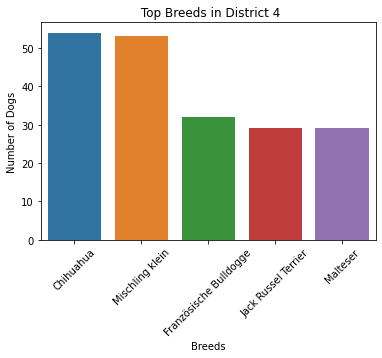

In [4]:
#Top Ten Dogs Overall
print("The Top Ten Dogs in Zurich (Percentage)")
print(dog_data['RASSE1'].value_counts()[0:10]*100/len(dog_data))
df_agg = dog_data.set_index(['STADTKREIS'])
df_4 = df_agg.loc[4.0,:]
df_breed= df_4['RASSE1'].value_counts()
print("")
print("The Top 5 Dogs in the 4th District")
top_breed = df_breed.sort_values(ascending=False)[0:5]
print(top_breed)
g = sns.barplot(x=top_breed.index,y=top_breed)
g.set_xticklabels(top_breed.index,rotation=45)
plt.title(" Top Breeds in District 4")
plt.xlabel("Breeds")
plt.ylabel("Number of Dogs")
plt.show()

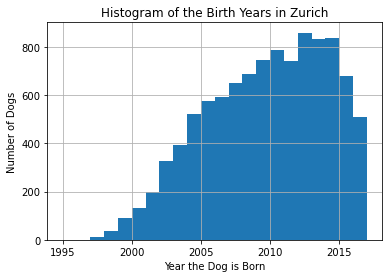

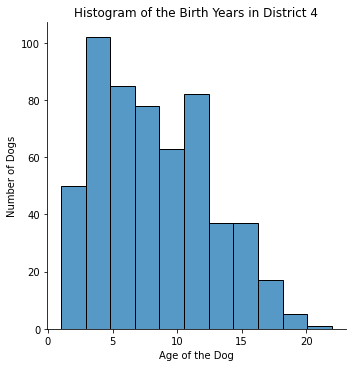

The Statistics of Age of Dog in District 4
count    1460.000000
mean        8.082585
std      2012.416600
min        22.000000
25%        12.000000
50%         8.000000
75%         4.000000
max         1.000000
Name: GEBURTSJAHR_HUND, dtype: float64


In [5]:
#What's the age distribution? Is it puppy friendly or a mature dog neighborhood?
dog_data['GEBURTSJAHR_HUND'].hist(bins=22,range=(1995,2017))
plt.xlabel('Year the Dog is Born')
plt.ylabel('Number of Dogs')
plt.title('Histogram of the Birth Years in Zurich')
plt.show()

sns.displot(2017-df_4['GEBURTSJAHR_HUND'])
plt.xlabel('Age of the Dog')
plt.title('Histogram of the Birth Years in District 4')
plt.ylabel('Number of Dogs')
plt.show()
print("The Statistics of Age of Dog in District 4")
print(2017-df_4['GEBURTSJAHR_HUND'].describe())

C:\Users\jenny\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


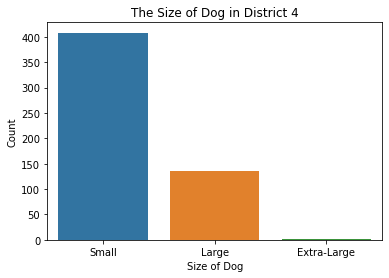

In [6]:
#District 4 big or small
df_4.replace({'RASSENTYP':{'K':'Small','I':'Large','II':'Extra-Large'}},inplace=True)
sns.countplot(x='RASSENTYP',data=df_4)
plt.xlabel('Size of Dog')
plt.ylabel('Count')
plt.title('The Size of Dog in District 4')
plt.show()

       GESCHLECHT  ALTER
count         557    557
unique          2      9
top             w  51-60
freq          323    116


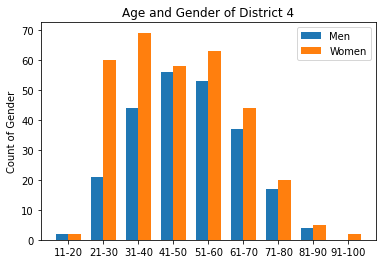

In [22]:
#What is the demographics of District 4 (Human)?
labels = sorted(df_4['ALTER'].unique())
gender_age = df_4.groupby(['GESCHLECHT','ALTER']).agg(['count'])
men_means = gender_age.loc['m','HALTER_ID'].to_numpy()
women_means = gender_age.loc['w','HALTER_ID'].to_numpy()
men_means = men_means.reshape((1,8))
women_means = women_means.reshape((1,9))

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x[0:8] - width/2, men_means[0], width, label='Men')
rects2 = ax.bar(x + width/2, women_means[0], width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count of Gender')
ax.set_title('Age and Gender of District 4')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#General Stats 
print(df_4.loc[:,['GESCHLECHT','ALTER']].describe())


In [218]:
#What are the main mixed types?

Float64Index([9.0, 2.0, 6.0, 7.0, 10.0, 3.0, 11.0, 8.0, 5.0, 4.0, nan, 12.0,
              1.0],
             dtype='float64', name='STADTKREIS')
